## Housing Price Estimation Using Gradient Boosting Regressor

Code for Kaggle Contest: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
data = pd.read_csv(r'house_price\train.csv')
data.head()
data_test = pd.read_csv(r'house_price\test.csv')

Studying the correlation between the attributes using correlation heat map

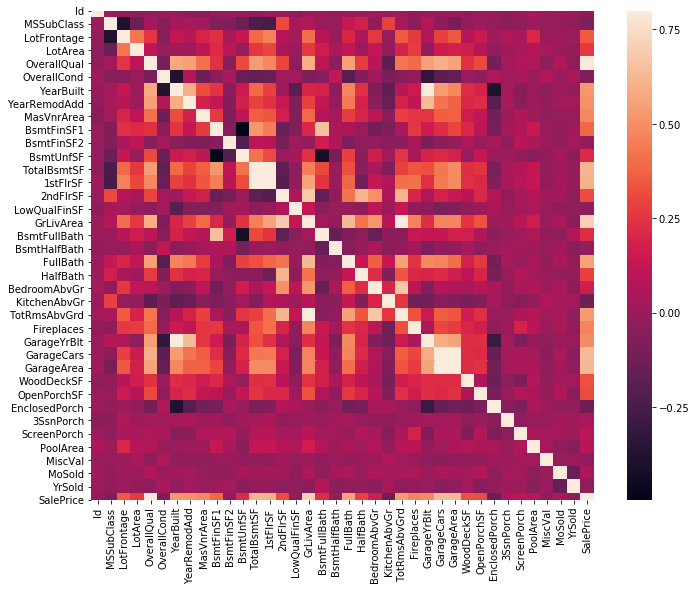

In [4]:
correlation = data.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(correlation, vmax= 0.8, square = True)

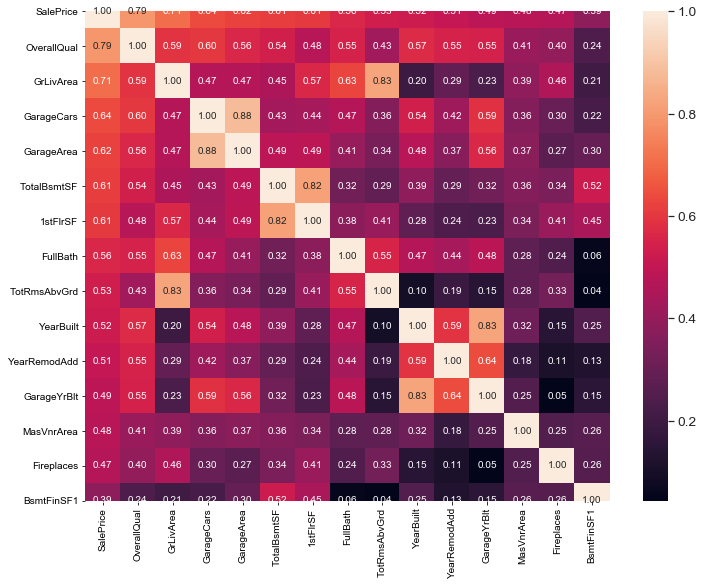

In [5]:
nf = 15
#correlation.unstack().sort_values()['SalePrice'][-10:]
cols = correlation.nlargest(nf,'SalePrice')['SalePrice'].index
cm = data[cols].corr()
f , ax = plt.subplots(figsize = (12,9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [6]:
#sns.set()
#sns.pairplot(data[cols], size = 2.5)
#plt.show()

In [7]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
data = data.drop(missing_data[missing_data['Total']>1].index,1)
data_test = data_test.drop(missing_data[missing_data['Total']>1].index,1)
data_test.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [9]:
from sklearn.preprocessing import StandardScaler
scaled_price = StandardScaler().fit_transform(data['SalePrice'][:,np.newaxis])
#data.loc[data['SalePrice'].sort_values()[-2]]
data = data.drop(data['SalePrice'].sort_values().index[-2:])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


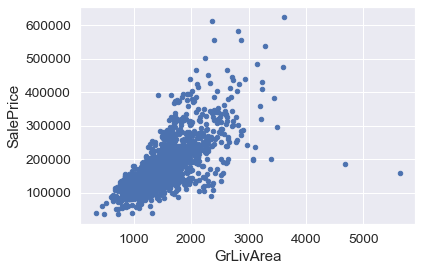

In [10]:
pd.concat([data['SalePrice'],data['GrLivArea']],axis = 1).plot.scatter(x ='GrLivArea',y='SalePrice')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


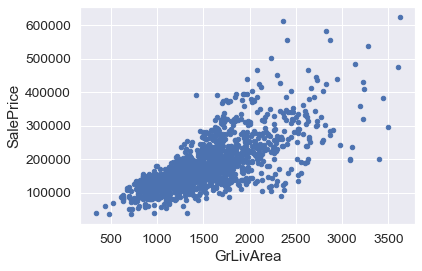

In [11]:
data = data.drop(data['GrLivArea'].sort_values().index[-2:])
pd.concat([data['SalePrice'],data['GrLivArea']],axis = 1).plot.scatter(x ='GrLivArea',y='SalePrice')

((array([-3.30437073, -3.04710795, -2.90403844, ...,  2.90403844,
          3.04710795,  3.30437073]),
  array([ 34900,  35311,  37900, ..., 582933, 611657, 625000], dtype=int64)),
 (72529.25745327889, 180151.23351648354, 0.9441000819950993))

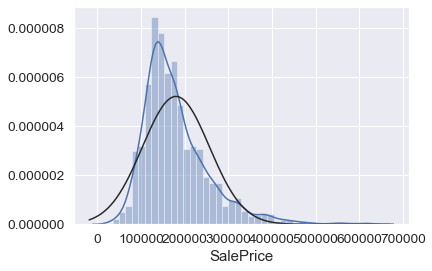

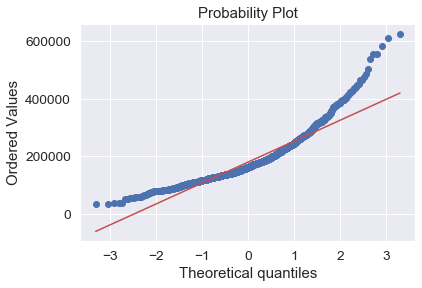

In [12]:
from scipy.stats import norm
from scipy import stats
sns.distplot(data['SalePrice'], fit = norm)
fig = plt.figure()
stats.probplot(data['SalePrice'], plot = plt)

In [13]:
data['SalePrice'] = np.log(data['SalePrice'])

((array([-3.30437073, -3.04710795, -2.90403844, ...,  2.90403844,
          3.04710795,  3.30437073]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.27582754,
         13.32392695, 13.34550693])),
 (0.3951405891746035, 12.021943004918326, 0.9959780618852745))

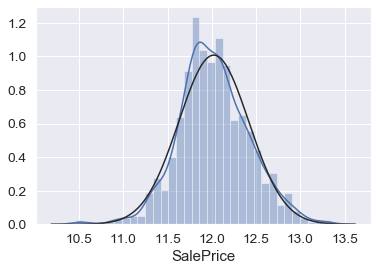

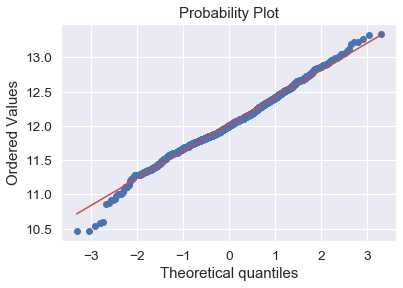

In [14]:
sns.distplot(data['SalePrice'], fit = norm)
fig = plt.figure()
stats.probplot(data['SalePrice'], plot = plt)

In [15]:
cols = cols.drop(['GarageCars','1stFlrSF','FullBath'])

((array([-3.30437073, -3.04710795, -2.90403844, ...,  2.90403844,
          3.04710795,  3.30437073]),
  array([   0,    0,    0, ..., 1248, 1356, 1390], dtype=int64)),
 (209.85768021997512, 471.5686813186814, 0.9883202612981885))

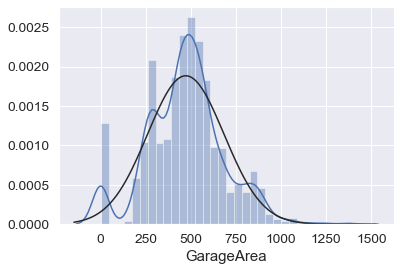

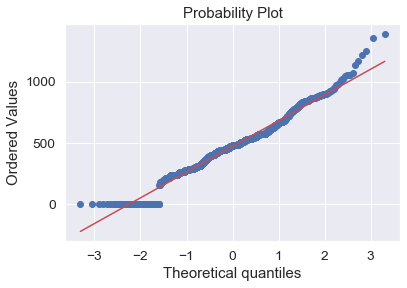

In [16]:
sns.distplot(data['GarageArea'], fit = norm)
fig = plt.figure()
stats.probplot(data['GarageArea'], plot = plt)

((array([-3.30437073, -3.04710795, -2.90403844, ...,  2.90403844,
          3.04710795,  3.30437073]),
  array([   0,    0,    0, ..., 3094, 3200, 3206], dtype=int64)),
 (405.70193445896007, 1050.6586538461538, 0.9827128292924933))

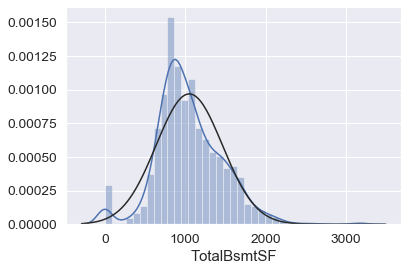

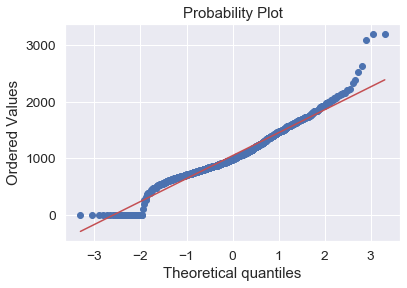

In [17]:
sns.distplot(data['TotalBsmtSF'], fit = norm)
fig = plt.figure()
stats.probplot(data['TotalBsmtSF'], plot = plt)

((array([-3.30437073, -3.04710795, -2.90403844, ...,  2.90403844,
          3.04710795,  3.30437073]),
  array([ 334,  438,  480, ..., 3493, 3608, 3627], dtype=int64)),
 (487.6292397883707, 1506.5020604395606, 0.9798860671453355))

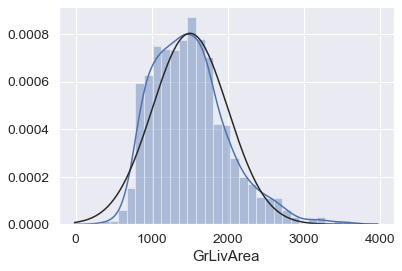

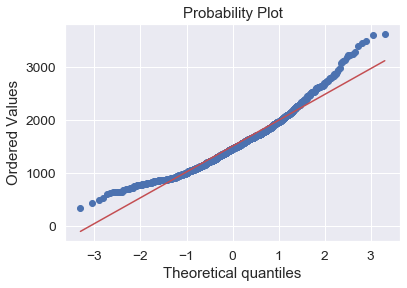

In [18]:
sns.distplot(data['GrLivArea'], fit = norm)
fig = plt.figure()
stats.probplot(data['GrLivArea'], plot = plt)

In [19]:
data['GrLivArea'] = np.log(data['GrLivArea'])
data_test['GrLivArea'] = np.log(data_test['GrLivArea'])

In [20]:
columns = ['Id'] + [x for x in cols[:7]]
data_essen = data[columns]
data_essen.head()

,Id,SalePrice,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,TotRmsAbvGrd,YearBuilt
0,1,12.247694,7,7.444249,548,856,8,2003
1,2,12.109011,6,7.140453,460,1262,6,1976
2,3,12.317167,7,7.487734,608,920,6,2001
3,4,11.849398,7,7.448334,642,756,7,1915
4,5,12.429216,8,7.695303,836,1145,9,2000


In [21]:
columns.pop(1)
data_essen_test = data_test[columns]
data_essen_test

,Id,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,TotRmsAbvGrd,YearBuilt
0,1461,5,6.797940,730.0,882.0,5,1961
1,1462,6,7.192182,312.0,1329.0,6,1958
2,1463,5,7.395722,482.0,928.0,6,1997
3,1464,6,7.380256,470.0,926.0,7,1998
4,1465,8,7.154615,506.0,1280.0,5,1992
...,...,...,...,...,...,...,...
1454,2915,4,6.995766,0.0,546.0,5,1970
1455,2916,4,6.995766,286.0,546.0,6,1970
1456,2917,5,7.109879,576.0,1224.0,7,1960
1457,2918,5,6.877296,0.0,912.0,6,1992


In [22]:
req_cols = data.columns.drop(['SalePrice'])
x= data[req_cols]
y = data['SalePrice']
num_train = len(x)
dataset = pd.concat([x,data_test],axis= 0)
dataset = pd.get_dummies(dataset)
train_processed = dataset[:num_train]
test_processed = dataset[num_train:]
dataset

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,4,7,1970,1970,0.0,0.0,546.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,1894,4,5,1970,1970,252.0,0.0,294.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,20000,5,7,1960,1996,1224.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,10441,5,5,1992,1992,337.0,0.0,575.0,...,0,0,0,1,0,0,0,0,1,0


In [23]:
from sklearn.model_selection import train_test_split
train_set = train_processed[train_processed.columns.drop('Id')]
x_train,x_test,y_train,y_test = train_test_split(train_set,y)
y_test.index

Int64Index([ 627,  142,  722, 1137,  943,   42,   62,  318,  539, 1201,
            ...
            1405, 1117, 1017, 1132,  385, 1140,  499,  115,  674, 1094],
           dtype='int64', length=364)

In [24]:
x_test.index

Int64Index([ 627,  142,  722, 1137,  943,   42,   62,  318,  539, 1201,
            ...
            1405, 1117, 1017, 1132,  385, 1140,  499,  115,  674, 1094],
           dtype='int64', length=364)

In [25]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, accuracy_score,mean_squared_error

scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
ridge = Ridge(alpha= 2)
model1 = ridge.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)

print("R2 score is", r2_score(y_test,y_pred1))
print("MSE is", mean_squared_error(y_test,y_pred1))
y_pred1[-10:]


R2 score is 0.9185365522892751
MSE is 0.012055796635666567


array([12.52656344, 11.81775332, 12.14548953, 11.75474605, 12.12124683,
       11.73301821, 11.71741134, 12.01827384, 11.89937116, 11.81324458])

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(min_samples_split = 2, learning_rate = 0.0644, max_depth = 4, n_estimators = 200)
model2 = gbr.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)

print("R2 score is", r2_score(y_test,y_pred2))
print("MSE is", mean_squared_error(y_test,y_pred2))

R2 score is 0.9148228738005438
MSE is 0.01260538487295032


In [34]:
from sklearn.model_selection import GridSearchCV
params = [{'learning_rate':np.linspace(0.01,0.5,10),'n_estimators':[int(x) for x in np.linspace(10,200,10)],
           'max_depth':[int(x) for x in np.linspace(1,15,5)]}]
grid = GridSearchCV(GradientBoostingRegressor(),params,cv=5,scoring= 'r2')
mod = grid.fit(x_train,y_train)

KeyboardInterrupt: 

In [1]:
mod.best_params_

NameError: name 'mod' is not defined

In [43]:
test_set = test_processed.drop(['Id'], axis = 1)
test_set[test_set.isnull()==True] = 0
scaled_test = scaler.transform(test_set)
predictions = model2.predict(scaled_test)
predictions = [np.exp(x) for x in predictions]
predictions[-5:]

[85595.53854970013,
 86668.21364195638,
 171730.5041769936,
 127947.4951018031,
 230263.27082480444]

In [44]:
predict_df = pd.DataFrame()
predict_df['SalePrice'] = predictions
submit = pd.concat([test_processed['Id'],predict_df], axis = 1)
submit.to_csv('submission.csv')

In [45]:
essen_y = data_essen['SalePrice']
essen_x = data_essen[[x for x in columns if not x=='SalePrice' and not x=='Id']]
essen_x

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,TotRmsAbvGrd,YearBuilt
0,7,7.444249,548,856,8,2003
1,6,7.140453,460,1262,6,1976
2,7,7.487734,608,920,6,2001
3,7,7.448334,642,756,7,1915
4,8,7.695303,836,1145,9,2000
...,...,...,...,...,...,...
1455,6,7.406711,460,953,7,1999
1456,6,7.636752,500,1542,7,1978
1457,7,7.757906,252,1152,9,1941
1458,5,6.982863,240,1078,5,1950


In [33]:
from sklearn.model_selection import train_test_split
ex_train,ex_test,ey_train,ey_test = train_test_split(essen_x,essen_y)
scaler2 = MinMaxScaler().fit(ex_train)
ex_train = scaler2.transform(ex_train)
ex_test = scaler2.transform(ex_test)
model3 = gbr.fit(ex_train,ey_train)
y_pred3 = model3.predict(ex_test)
print("R2 score is", r2_score(ey_test,y_pred3))
print("MSE is", mean_squared_error(ey_test,y_pred3))

R2 score is 0.7900078840682109
MSE is 0.031835959084865105
